## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя.

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0**

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [5]:
#Завдання 0
# Завантаження даних
customer_set = 'Mall_Customers.csv'

# Завантаження даних з явною вказівкою роздільника ","
data = pd.read_csv(customer_set, delimiter=',')

# Перейменування атрибутів
data = data.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'})

# Перегляд атрибутів вибірки
print("Атрибути вибірки після перейменування:")
print(data.columns)


Атрибути вибірки після перейменування:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')


**Завдання 1**

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка;
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [6]:
#Завдання 1

# Перегляд атрибутів вибірки
print("Атрибути вибірки:")
print(data.columns)

# Розмірність датасету
print("Розмірність датасета:")
print(data.shape)

# Основна статистична інформація щодо числових змінних
print("Основна статистична інформація:")
print(data.describe())

# Перевірка наявності NaN
print("Перевірка наявності NaN:")
print(data.isnull().sum())

Атрибути вибірки:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')
Розмірність датасета:
(200, 5)
Основна статистична інформація:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000
Перевірка наявності NaN:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2**

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [9]:
#Завдання 2
# Видалення змінної CustomerID
data.drop(columns=['CustomerID'], inplace=True)

# Перегляд атрибутів вибірки після видалення CustomerID
print("Атрибути вибірки після видалення CustomerID:")
print(data.columns)

Атрибути вибірки після видалення CustomerID:
Index(['Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')


**Завдання 3**

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

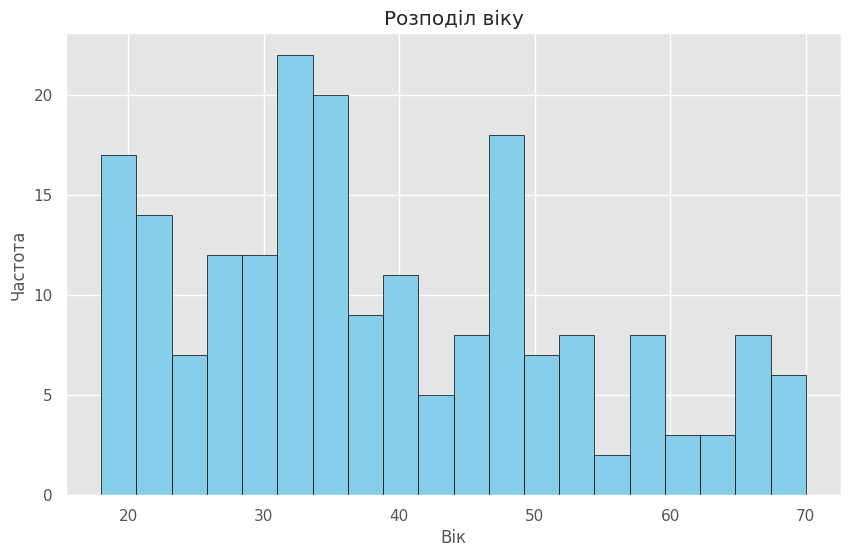

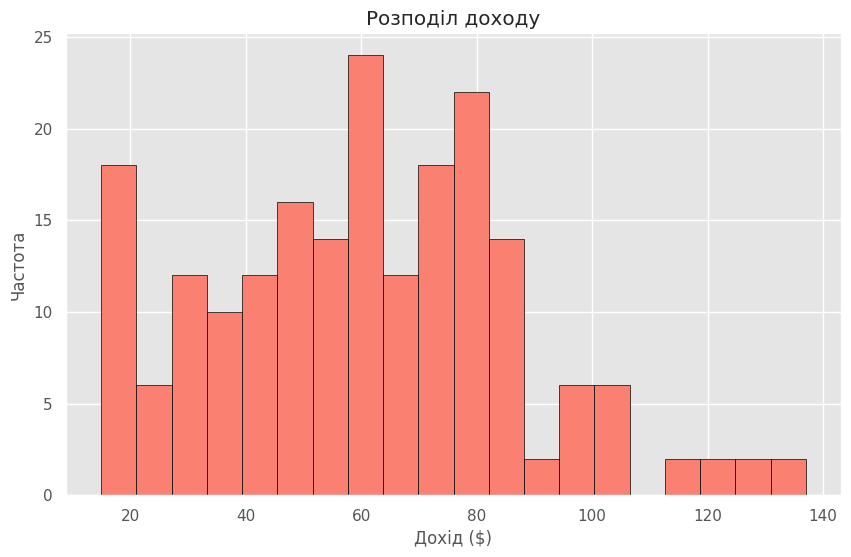

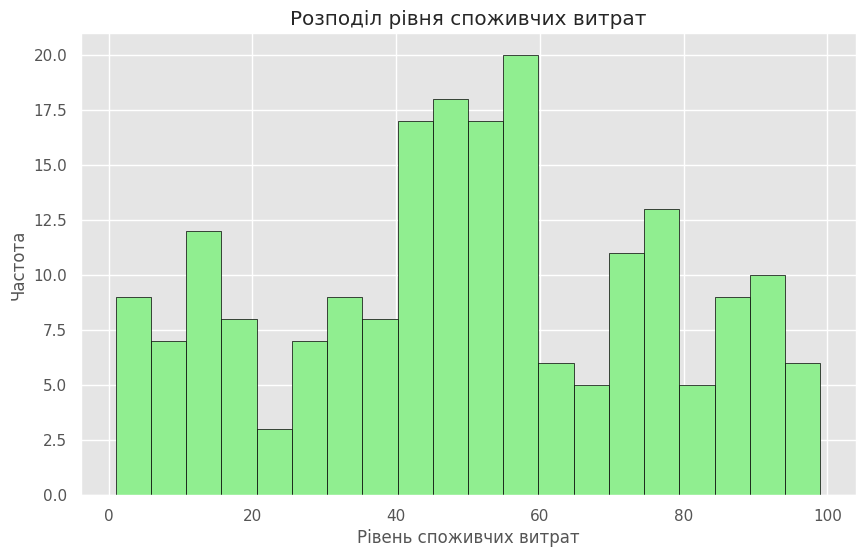

In [ ]:
#Завдання 3
# Для побудови діаграм розподілу змінних Age, Income та SpendingScore у Python ми використаєм бібліотеку matplotlib.
# Стиль ggplot гарний вибір для створення привабливих та легко читаних графіків у Matplotlib. Встановлюемо стиль графіків
plt.style.use('ggplot')

# Створення гістограми розподілу змінної Age
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл віку')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Створення гістограми розподілу змінної Income
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], bins=20, color='salmon', edgecolor='black')
plt.title('Розподіл доходу')
plt.xlabel('Дохід ($)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Створення гістограми розподілу змінної SpendingScore
plt.figure(figsize=(10, 6))
plt.hist(data['SpendingScore'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Розподіл рівня споживчих витрат')
plt.xlabel('Рівень споживчих витрат')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Завдання 4**

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`.
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  

* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  


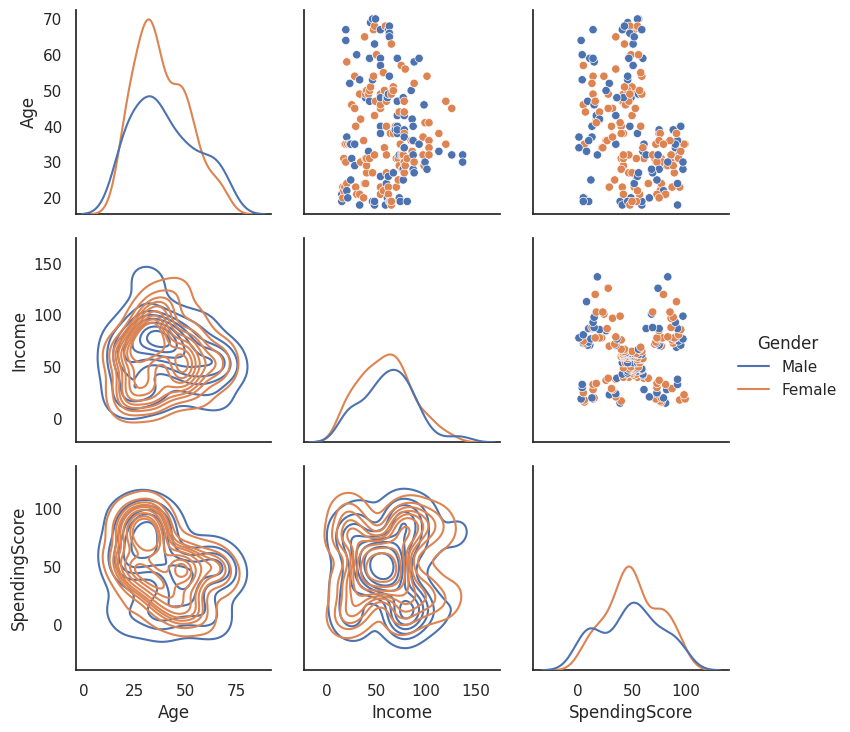

In [ ]:
#Завдання 4

# Для побудови діаграм у Python ми використаєм бібліотеки seaborn та matplotlib.

# Встановлення стилю графіків
sns.set(style="white")

# Створення PairGrid
g = sns.PairGrid(data, hue = "Gender")

# Верхній правий кут: scatterplot
g.map_upper(sns.scatterplot)

# Діагональ: kdeplot
g.map_diag(sns.kdeplot)

# Лівий нижній кут: kdeplot з lw=1
g.map_lower(sns.kdeplot, lw=1)

# Додавання легенди
g.add_legend()

# Відображення графіка
plt.show()

**Висновки з 1-4 завдання (детальні)**

**1. Початок:**
* Ми завантажили данні для обчислення, та виконали первинну підготовку. Наша вибірка мала змінну CustomerID. Ця змінна не впливає на аналіз даних тому ми її видалили.

**2. Діаграми розподілу:**
* Розподіл віку має форму, близьку до нормальної, з деякою кількістю молодих та старших клієнтів.
* Розподіл рівня споживчих витрат зміщений праворуч, що може вказувати на те, що більшість клієнтів мають низький або середній рівень споживчих витрат.

**3. Взаємозв'язок змінних з урахуванням статі:**
* Парні діаграми показують розподіл змінних Age, Income та SpendingScore щодо змінної Gender.
* На діагоналі відображені ядерні оцінки щільності кожної змінної залежно від статі, дозволяючи побачити розподіл кожної змінної чоловікам і жінок.


**Завдання 5**

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Співвідношення за статтю:
Gender
Female    112
Male       88
Name: count, dtype: int64


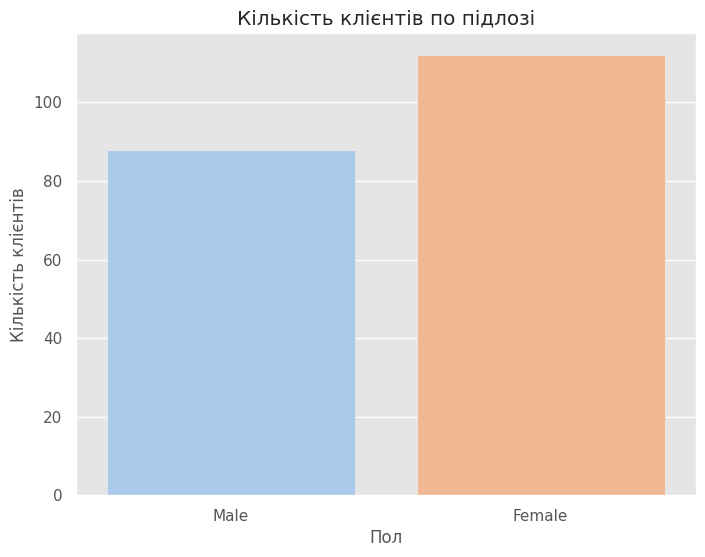

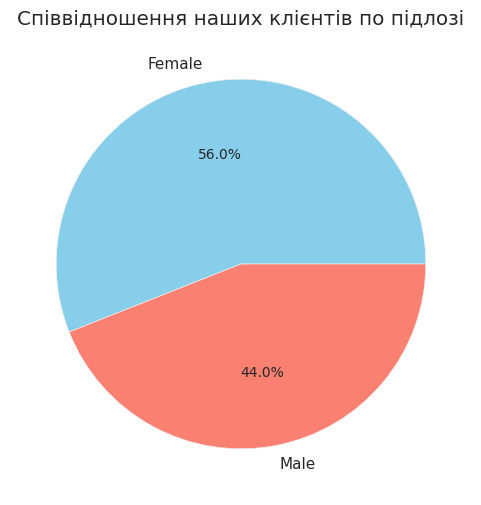

In [ ]:
#Завдання 5

# Виведемо співвідношення за статтями
gender_counts = data['Gender'].value_counts()
print("Співвідношення за статтю:")
print(gender_counts)

# Побудуємо countplot по Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Кількість клієнтів по підлозі')
plt.xlabel('Пол')
plt.ylabel('Кількість клієнтів')
plt.show()

# Побудуємо pie Gender
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Співвідношення наших клієнтів по підлозі')
plt.show()

**Аналіз змінної Gender:**

1. **Співвідношення за статтями:**
    - Ми бачимо, що в нашому наборі даних присутні дві статі: чоловіки та жінки.
    - Співвідношення клієнтів за статтю складає 44% чоловіків та 56% жінок.

2. **Візуалізація за допомогою countplot:**
    - Countplot явно демонструє кількість клієнтів для кожної статі.
    - Ми бачимо, що у наборі даних переважають клієнти жіночої статі.

3. **Візуалізація за допомогою pie:**
    - Pie-діаграма також показує співвідношення клієнтів за статтю.
    - Візуалізація підтверджує, що жінки становлять більшу частину клієнтів у даному наборі даних.

**Завдання 6**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

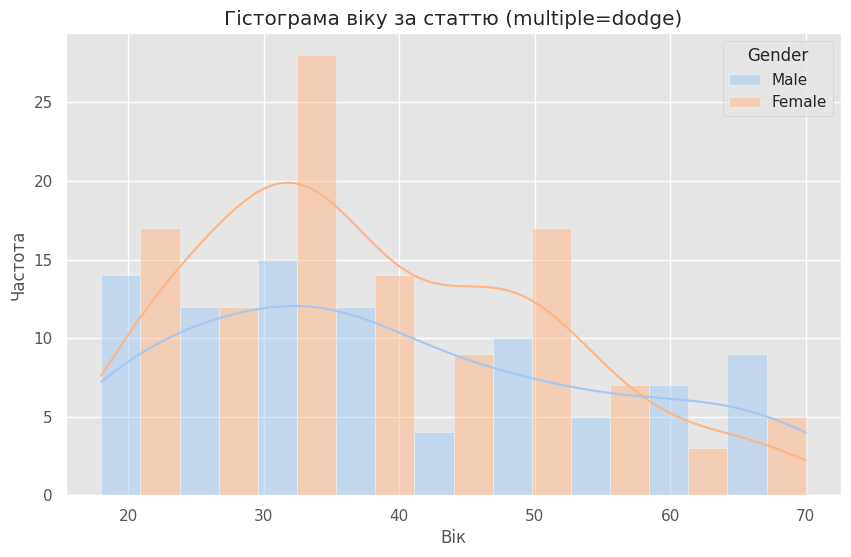

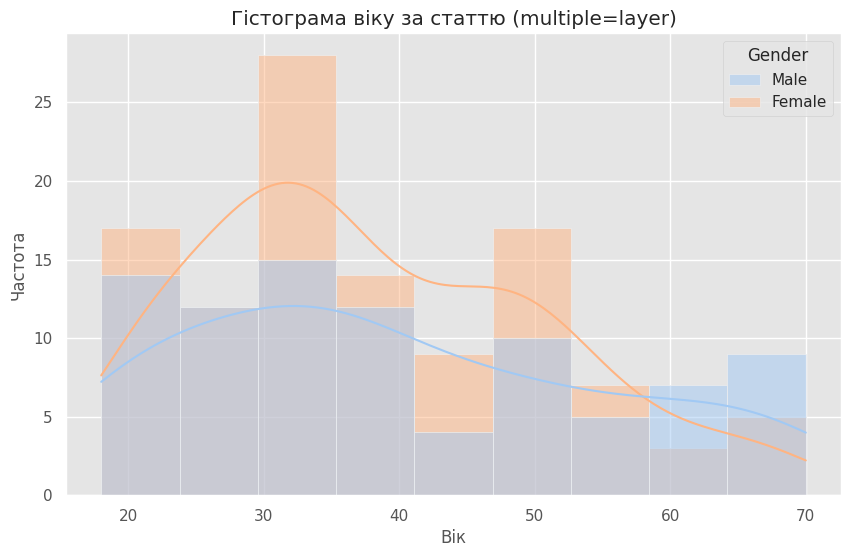

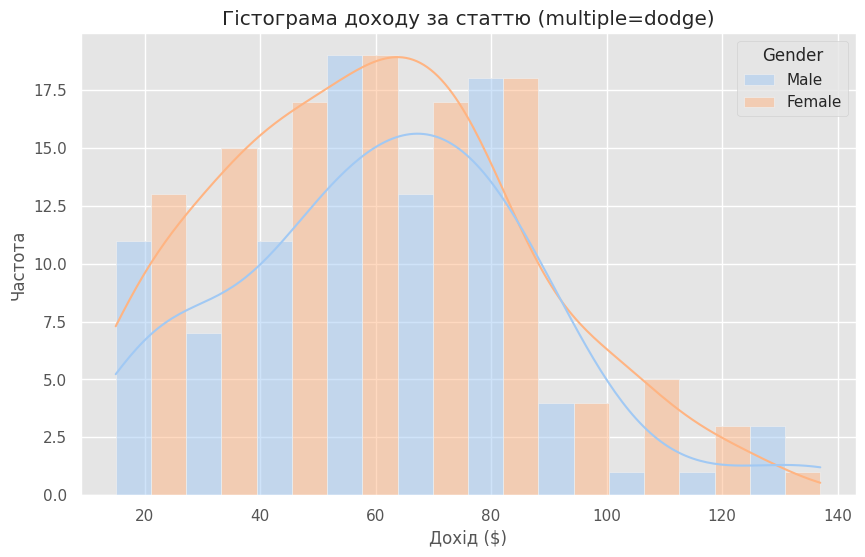

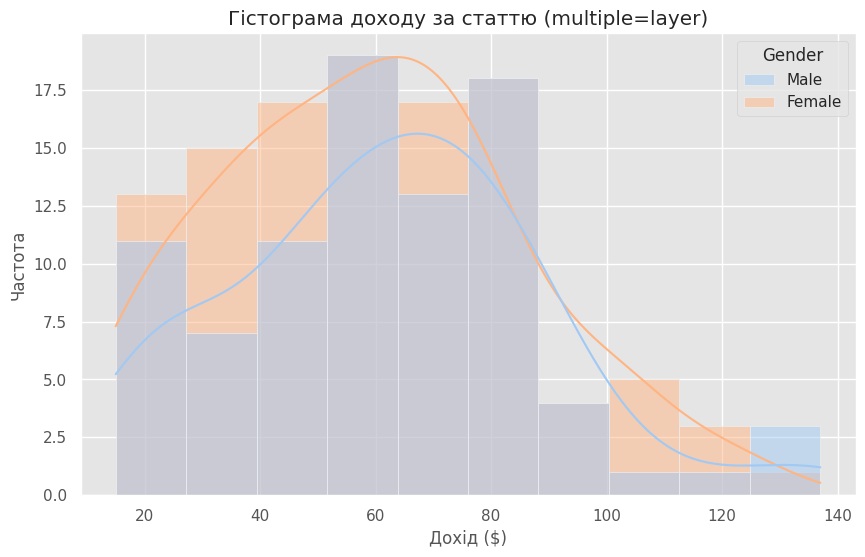

In [ ]:
#Завдання 6

# Побудуємо гістограму змінної Age щодо змінної Gender з параметром multiple='dodge'
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', hue='Gender', multiple='dodge', palette='pastel', kde=True)
plt.title('Гістограма віку за статтю (multiple=dodge)')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

# Побудуємо гістограму змінної Age щодо змінної Gender з параметром multiple='layer'
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', hue='Gender', multiple='layer', palette='pastel', kde=True)
plt.title('Гістограма віку за статтю (multiple=layer)')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

# Побудова гістограми змінної Income щодо змінної Gender з параметром multiple='dodge'
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Income', hue='Gender', multiple='dodge', palette='pastel', kde=True)
plt.title('Гістограма доходу за статтю (multiple=dodge)')
plt.xlabel('Дохід ($)')
plt.ylabel('Частота')
plt.show()

# Побудуємо гістограму змінної Income щодо змінної Gender з параметром multiple='layer'
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Income', hue='Gender', multiple='layer', palette='pastel', kde=True)
plt.title('Гістограма доходу за статтю (multiple=layer)')
plt.xlabel('Дохід ($)')
plt.ylabel('Частота')
plt.show()

**Завдання 7**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.



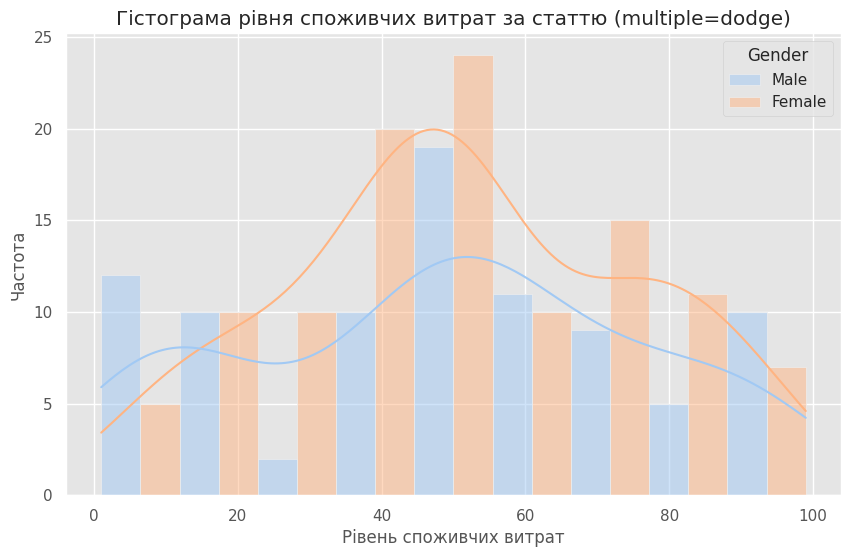

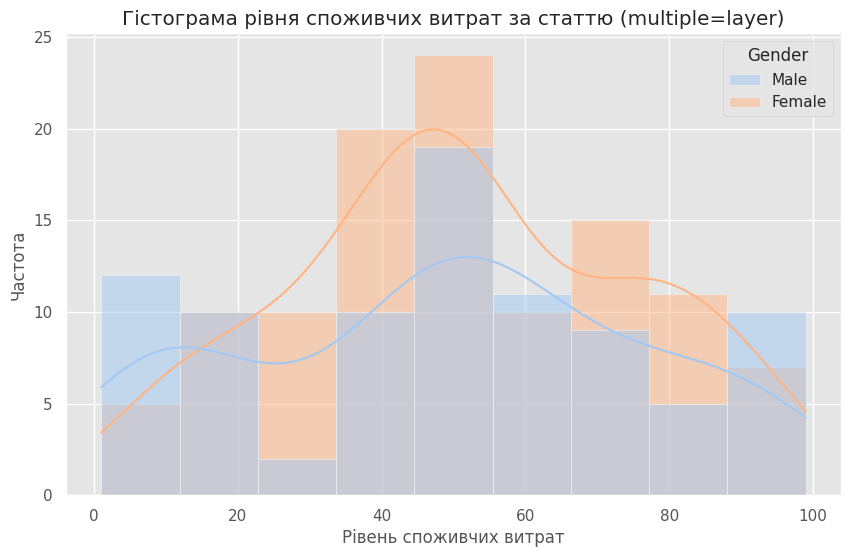

In [ ]:
#Завдання 7

# Побудуємо гістограми змінної SpendingScore щодо змінної Gender з параметром multiple='dodge'
plt.figure(figsize=(10, 6))
sns.histplot(data, x='SpendingScore', hue='Gender', multiple='dodge', palette='pastel', kde=True)
plt.title('Гістограма рівня споживчих витрат за статтю (multiple=dodge)')
plt.xlabel('Рівень споживчих витрат')
plt.ylabel('Частота')
plt.show()

# Побудуємо гістограми змінної SpendingScore щодо змінної Gender з параметром multiple='layer'
plt.figure(figsize=(10, 6))
sns.histplot(data, x='SpendingScore', hue='Gender', multiple='layer', palette='pastel', kde=True)
plt.title('Гістограма рівня споживчих витрат за статтю (multiple=layer)')
plt.xlabel('Рівень споживчих витрат')
plt.ylabel('Частота')
plt.show()

**Завдання 8**

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`.

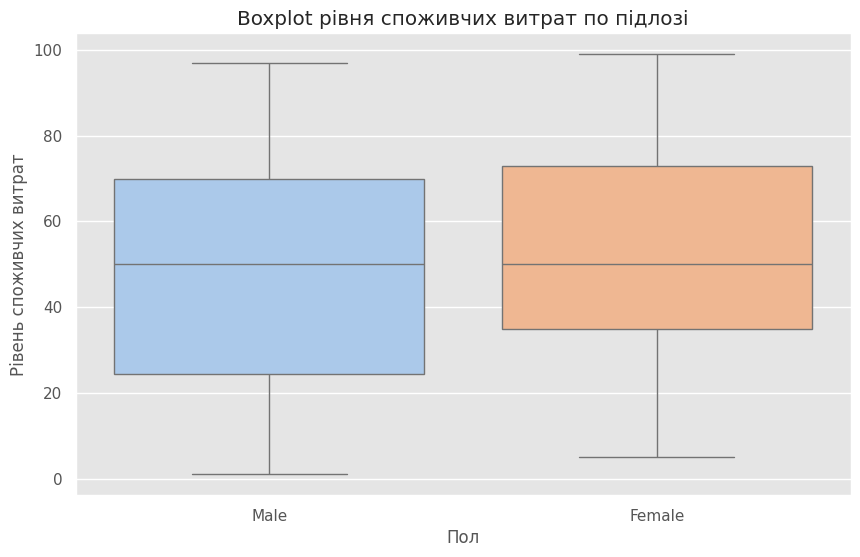

In [ ]:
#Завдання 8

# Для виконання побудуємо boxplot по змінній SpendingScore і згрупувати дані по змінній Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='SpendingScore', data=data, palette='pastel')
plt.title('Boxplot рівня споживчих витрат по підлозі')
plt.xlabel('Пол')
plt.ylabel('Рівень споживчих витрат')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?
* У нашій вибірці переважають жінки, їхня кількість становить 56%, тоді як кількість чоловіків становить 44%.
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини?
* Можна виділити вікові групи: 10, 20, 30 ... 90 років.
На графіку ми можемо бачити, що відповідно до статі витрати розподілені не рівномірно. В основному жінки витрачають більше на 20-30 років і на 40-50, 70-80.
* А чоловіки рівномірніше весь час, крім середніх років. Де можемо бачити зростання графіка 40-60 років.
3. Чи є різниця між витратами у чоловіків та жінок?
* У масовому втраченні чоловіки трохи більше витрачають (видно на графіку в завданні 8).
* Але в групі середнього віку і більше переважають витрати жінок (можемо бачити на графіку у завданні 7).

## K-means Method ##

**Завдання 9**

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

1. Для початку видалимо змінну Gender, тому що алгоритм кластеризації не працює з категоріальними змінними. Крім того, стать не є визначальним фактором для кластеризації в даній задачі, тому що ми хочемо визначити структуру кластерів на основі числових характеристик.

2. Задамо мінімальну та максимальну кількість кластерів самостійно. Для початку спробуємо розглянути від 2 до 10 кластерів.

3. Потім ми будемо використовувати метод ліктя (Elbow method), щоб визначити оптимальну кількість кластерів. Метод ліктя аналізує зміну внутрішньогрупової дисперсії залежно кількості кластерів і допомагає вибрати точку, де збільшення кількості кластерів не призводить до значного зменшення внутрішньогрупової дисперсії.

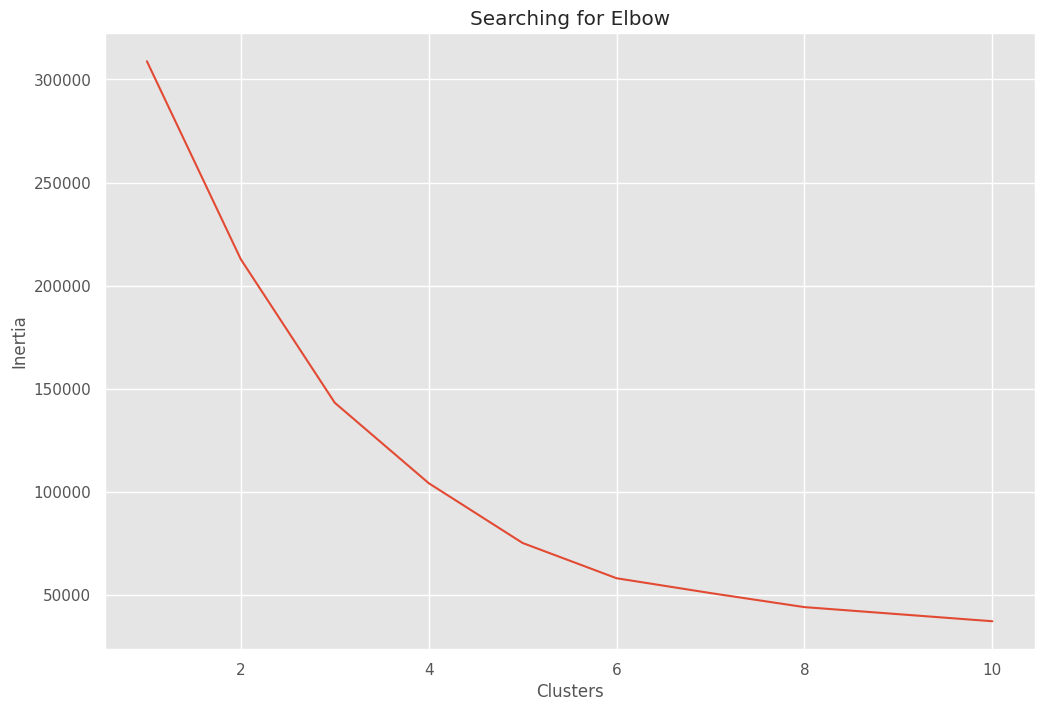

In [ ]:
#Завдання 9

# формула K-means кластеризація:
#\[
#J = \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_i} \lVert \mathbf{x} - \mathbf{\mu}_i \rVert^2
#\]

X = data.drop(['Gender'], axis=1)
clusters = []

# Задаємо мінімальну та максимальну кількість кластерів
min_clusters = 1
max_clusters = 10

# Проводимо кластеризацію з різною кількістю кластерів

clusters = []
for i in range(min_clusters, max_clusters + 1):
     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
     kmeans.fit(X)
     clusters.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)**

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів):
* В даному випадку на графіку спостерігається "лікоть" приблизно при кількості кластерів, що дорівнює 5 або 6.
* Якщо на графіку методу ліктя спостерігається 5-6 "ліктів" (тобто точок, де зміна інерції змінюється від різкого падіння до більш плавного зменшення), це може бути ознакою декількох оптимальних значень кількості кластерів.

**Завдання 10**

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`.

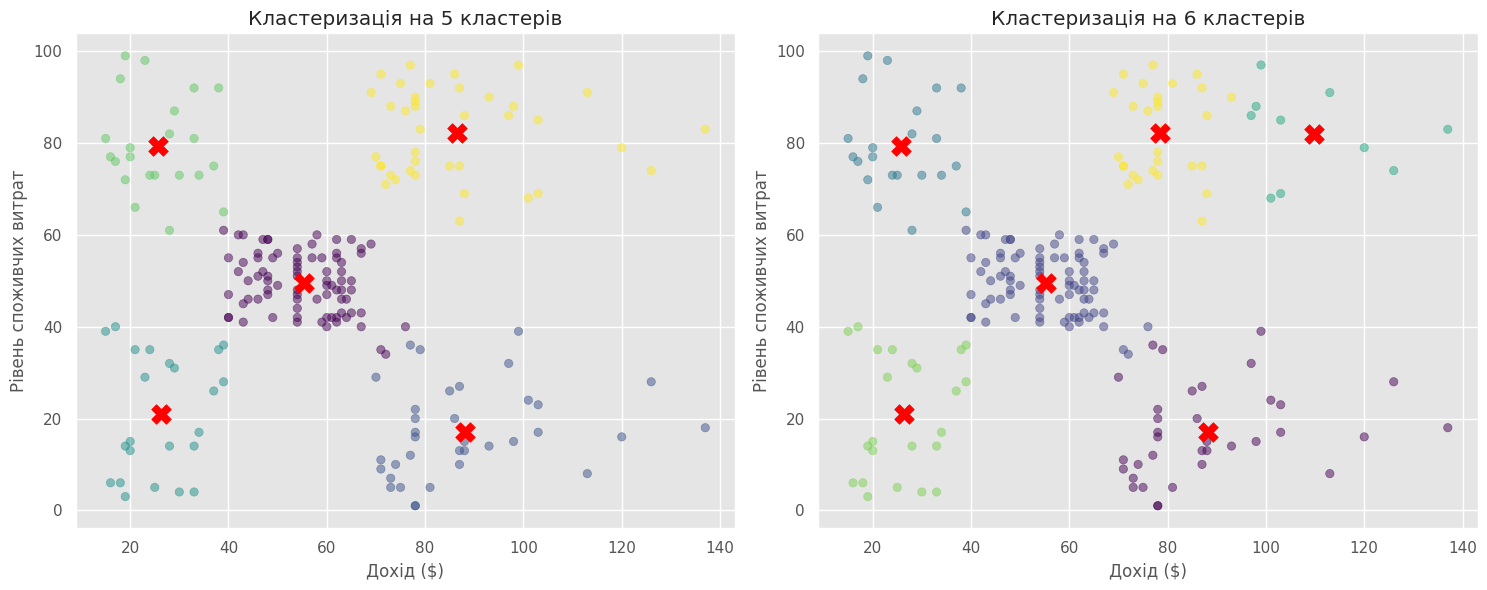

In [ ]:
#Завдання 10

# Вибір змінних для кластеризації
X = data[['Income', 'SpendingScore']]

# Кількість кластерів для кожного випадку
num_clusters = [5, 6]

# Створення subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Перебір за кількістю кластерів
for i, n_clusters in enumerate(num_clusters):
     # Кластеризація методом k-means
     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
     kmeans.fit(X)
     labels = kmeans.labels_

     # Візуалізація кластерів
     axs[i].scatter(X['Income'], X['SpendingScore'], c=labels, cmap='viridis', alpha=0.5)
     axs[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
     axs[i].set_title(f'Кластеризація на {n_clusters} кластерів')
     axs[i].set_xlabel('Дохід ($)')
     axs[i].set_ylabel('Рівень споживчих витрат')

plt.tight_layout()
plt.show()

**Завдання 11**

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [ ]:
#Завдання 11

# Вибір змінних для кластеризації
X = data[['Income', 'SpendingScore']]

# Кількість кластерів для кожного випадку
num_clusters = [5, 6]

# Створюємо функцію subplot від бібліотеки Matplotlib, для побудови кількох графіків
fig = px.scatter_3d(X, x='Income', y='SpendingScore', title='Візуалізація кластеризації методу К-середніх')

# Зробимо перебір за кількістю кластерів
for n_clusters in num_clusters:
     # Кластеризація методом k-means
     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
     kmeans.fit(X)
     labels = kmeans.labels_

     # Додавання кластерів у візуалізацію
     fig.add_scatter3d(x=X['Income'], y=X['SpendingScore'], z=np.zeros(len(X)), mode='markers',
                       marker=dict(color=labels, size=5, opacity=0.7), name=f'{n_clusters} кластерів')

# Відображення графіка
fig.show()

**Висновки з завдання 10 - 11 (детальні)**

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
**Аналіз кластерів, що вийшли:**

  1). **Кластер 1:** Група з низьким рівнем доходу та низьким рівнем споживчих витрат. Це, можливо, люди з низькими доходами, які заощаджують на витратах.

  2). **Кластер 2:** Група з низьким рівнем доходу та високим рівнем споживчих витрат. Це, ймовірно, люди з низькими доходами, але при цьому витрачають більшу частину свого доходу.

  3). **Кластер 3:** Група із середнім рівнем доходу та середнім рівнем споживчих витрат. Можливо, це найбільш типові споживачі, які витрачають приблизно стільки, скільки заробляють.

  4). **Кластер 4:** Група з високим рівнем доходу та низьким рівнем споживчих витрат. Можливо, це люди, які мають високі прибутки, але економлять більшу частину своїх коштів.

  5). **Кластер 5:** Група з високим рівнем доходу та високим рівнем споживчих витрат. Це, можливо, заможніші споживачі, які можуть собі дозволити витрачати значні суми на різні товари та послуги.

2.   Візуалізація кластеризації з використанням scatter plot дозволяє нам побачити структуру кластерів у двовимірному просторі змінних Income та SpendingScore.

    - При кількості кластерів, що дорівнює 5: Ми бачимо, що дані поділяються на п'ять окремих груп з різними рівнями доходу та споживчих витрат.
   
    - При кількості кластерів, що дорівнює 6: Розбиття даних на шість кластерів дозволяє виділити ще більш деталізовані групи з різними характеристиками доходу та споживчих витрат.

3. Візуалізація кластеризації з використанням scatter3d дозволяє нам побачити структуру кластерів у тривимірному просторі змінних Income, SpendingScore та номери кластера.

    - При кількості кластерів, що дорівнює 5: Ми бачимо, що дані поділяються на п'ять окремих груп у тривимірному просторі з різними рівнями доходу та споживчих витрат.
   
    - При кількості кластерів, що дорівнює 6: Розбиття даних на шість кластерів дозволяє виділити ще більш деталізовані групи з різними характеристиками доходу та споживчих витрат.

Виходячи з візуалізацій та аналізу отриманих результатів, оптимальним видається кількість кластерів рівну 6, так як ця кількість дозволяє отримати більш детальне розбиття даних та виділити більш чіткі групи з різними характеристиками доходу та споживчих витрат.

**Таким чином, аналіз кластерів дозволяє нам краще зрозуміти профілі споживачів та їхню поведінку щодо рівня доходу та споживчих витрат.**

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12**

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


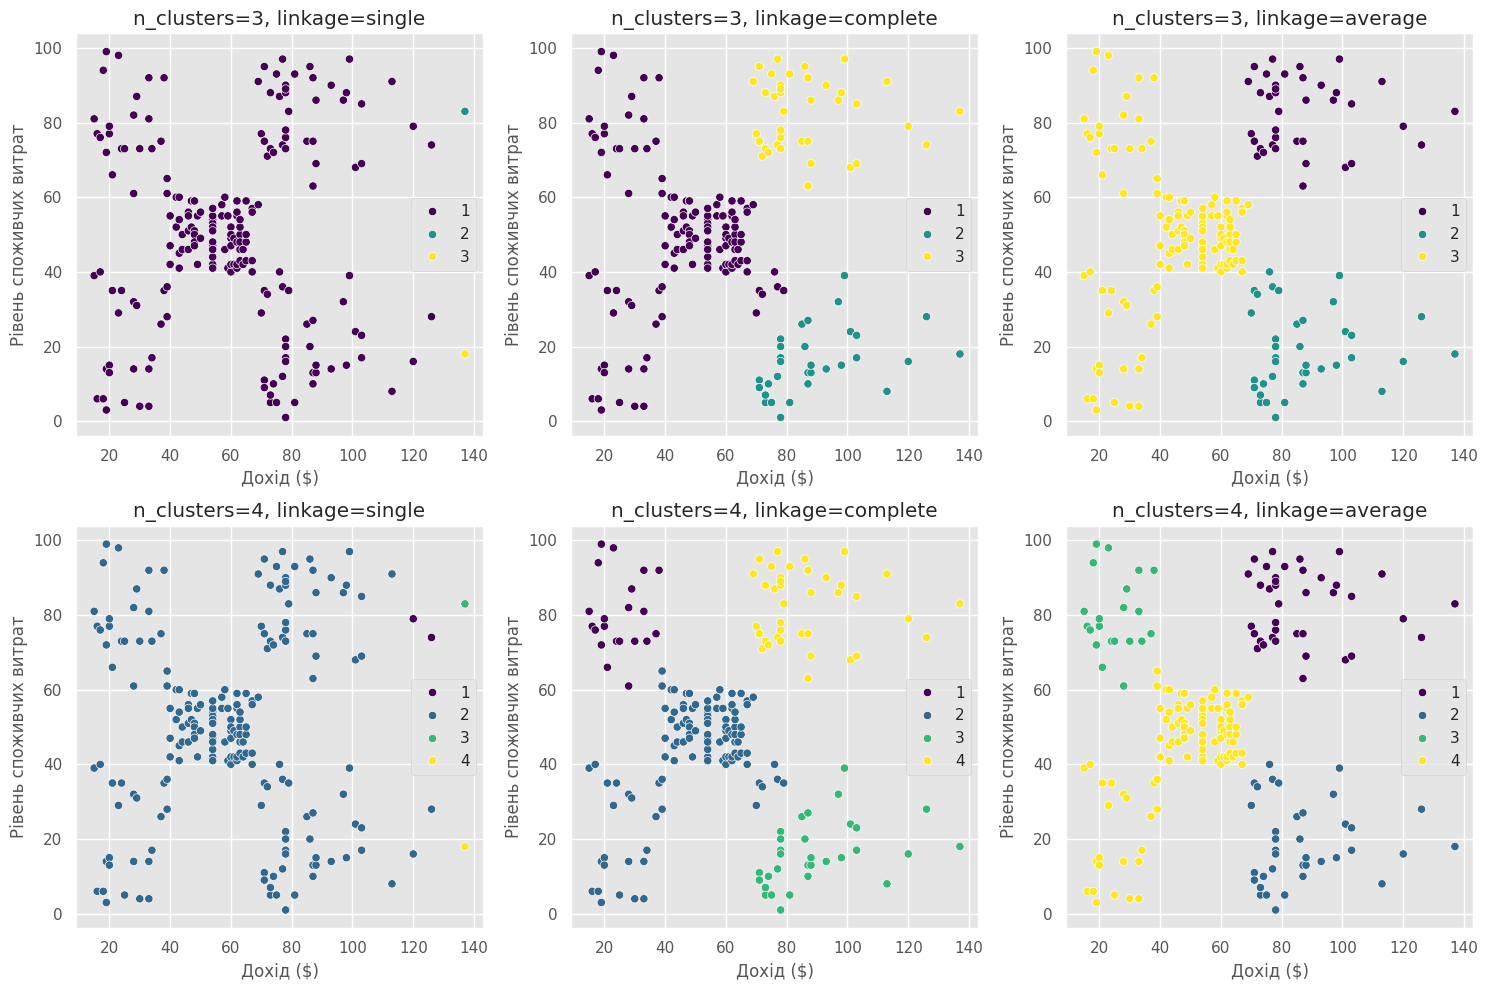

Візуалізація дендрограм:


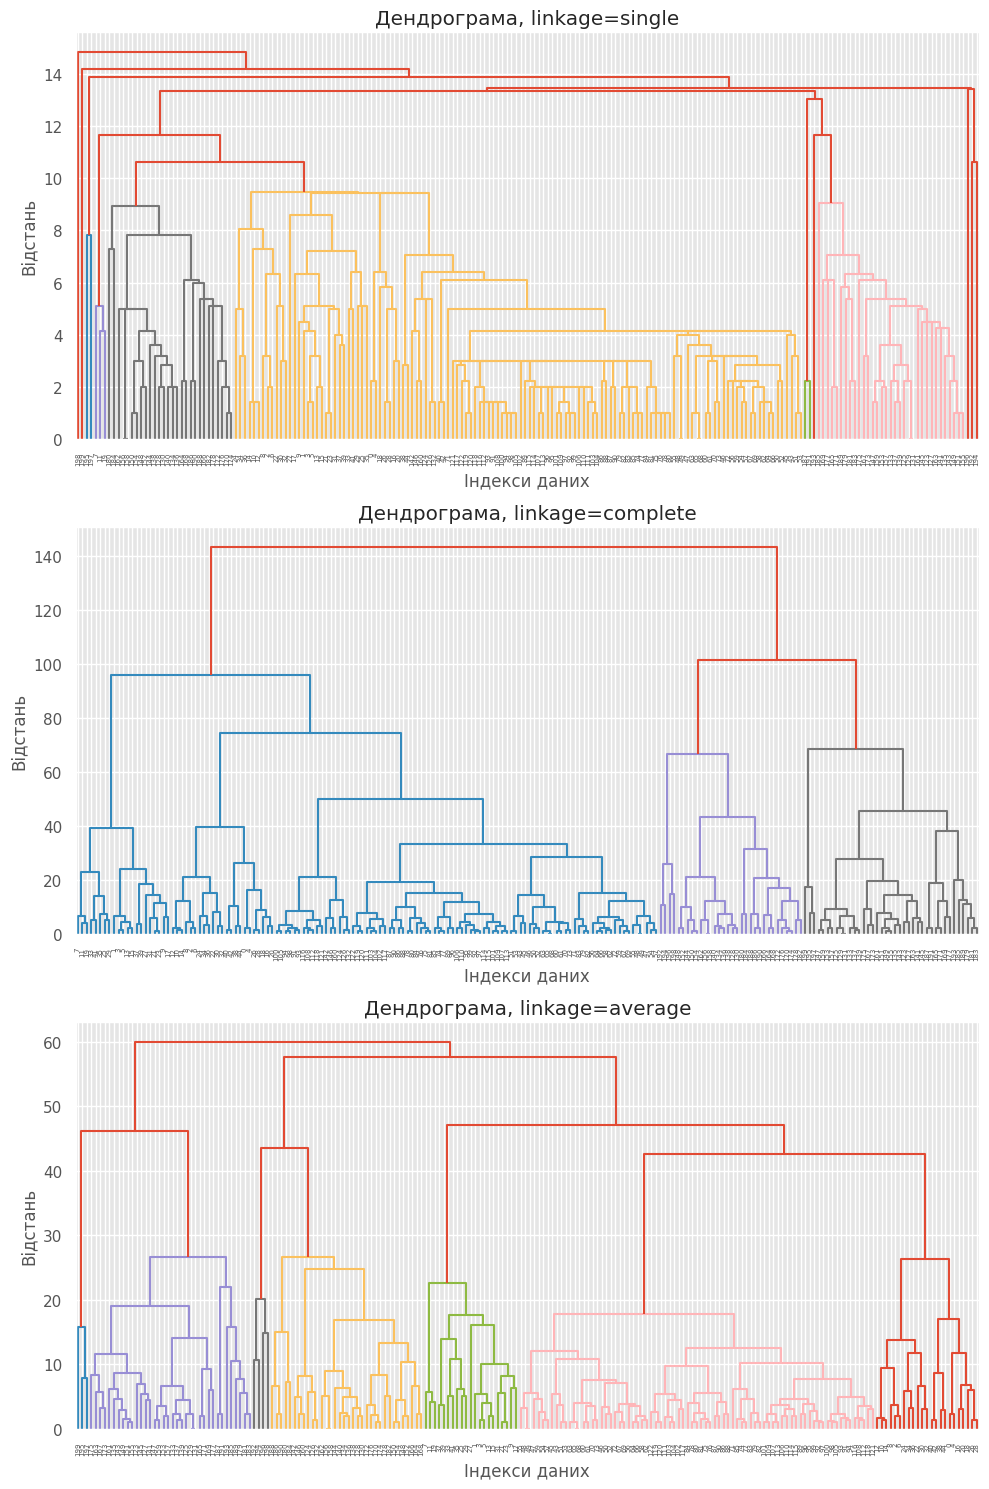

In [ ]:
#Завдання 12

# Використовуємо формулу Евклідова відстань:
# \[
# d(\mathbf{p},\mathbf{q}) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}
#\]

# Розраховуємо матрицю відстаней
distance_matrix = hierarchy.distance.pdist(X)

# Задаємо значення параметрів для кластеризації
n_clusters = [3, 4]
linkage_methods = ['single', 'complete', 'average']

# Створюємо subplot для візуалізації
fig, axs = plt.subplots(len(n_clusters), len(linkage_methods), figsize=(15, 10))

# Перебираємо значення параметрів та проводимо кластеризацію
for i, clusters in enumerate(n_clusters):
     for j, linkage_method in enumerate(linkage_methods):
         # Кластеризація
         Z = hierarchy.linkage (distance_matrix, method = linkage_method)
         clusters_assignment = hierarchy.fcluster(Z, clusters, criterion='maxclust')

         # Візуалізація
         sns.scatterplot(x=X['Income'], y=X['SpendingScore'], hue=clusters_assignment, ax=axs[i, j], palette='viridis')
         axs[i, j].set_title(f'n_clusters={clusters}, linkage={linkage_method}')
         axs[i, j].set_xlabel('Дохід ($)')
         axs[i, j].set_ylabel('Рівень споживчих витрат')

plt.tight_layout()
plt.show()

print("Візуалізація дендрограм:")
# Після візуалізації результатів кластеризації з різними значеннями параметрів linkage. Побудуємо дендрограму для кожного значення методу linkage.

# Створюємо subplot для візуалізації дендрограм
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(10, 15))

# Перебираємо значення параметрів та будуємо дендрограми
for j, linkage_method in enumerate(linkage_methods):
     # Розраховуємо матрицю відстаней і будуємо дендрограму
     Z = hierarchy.linkage (distance_matrix, method = linkage_method)
     dendrogram = hierarchy.dendrogram(Z, ax=axs[j])
     axs[j].set_title(f'Дендрограма, linkage={linkage_method}')
     axs[j].set_xlabel('Індекси даних')
     axs[j].set_ylabel('Відстань')

plt.tight_layout()
plt.show()

**Висновки з завдання 12 (детальні)**

З аналізу результатів агломеративної ієрархічної кластеризації з різними параметрами можна зробити
  такі висновки:

1. **Ефект параметра n_clusters:**
   
    - При збільшенні кількості кластерів (n_clusters) видно, що дані поділяються на дрібніші кластери.
   
    - При меншій кількості кластерів (наприклад, 3) видно об'єднання даних у меншу кількість великих кластерів, що быльшь наглядно показуе розподіл.

2. **Ефект параметра linkage:**

    - **Single linkage:** Цей метод зв'язку, що використовує мінімальну відстань між точками кластерів, може призвести до створення довгих ланцюжків кластерів, що не відповідає реальній структурі даних.
   
    - **Complete linkage:** Цей метод зв'язку, що використовує максимальну відстань між точками кластерів, може призвести до створення компактніших кластерів, що може бути корисно для виявлення щільних груп даних.
   
    - **Average linkage:** Цей метод зв'язку, що використовує середню відстань між точками кластерів, може бути більш стійким до викидів та шумів у даних, оскільки враховує середнє значення відстаней.

3. **Дендрограма:**

    - Дендрограма є графічним уявленням процесу об'єднання кластерів, дозволяючи нам оцінити оптимальну кількість кластерів для вивода даних.
   
    - По висоті кожного вузла дендрограми можна судити про відстань між кластерами, що об'єднуються. Чим вище вузол, тим далі один від одного кластери, що об'єднуються.

Виходячи з аналізу результатів, можна зробити висновок про те, що вибір параметрів n_clusters та linkage впливає на структуру та інтерпретацію кластерів. Необхідно підбирати параметри відповідно до особливостей даних та цілей аналізу, щоб отримати найбільш релевантні та показові результати кластеризації.

**Завдання 13**

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

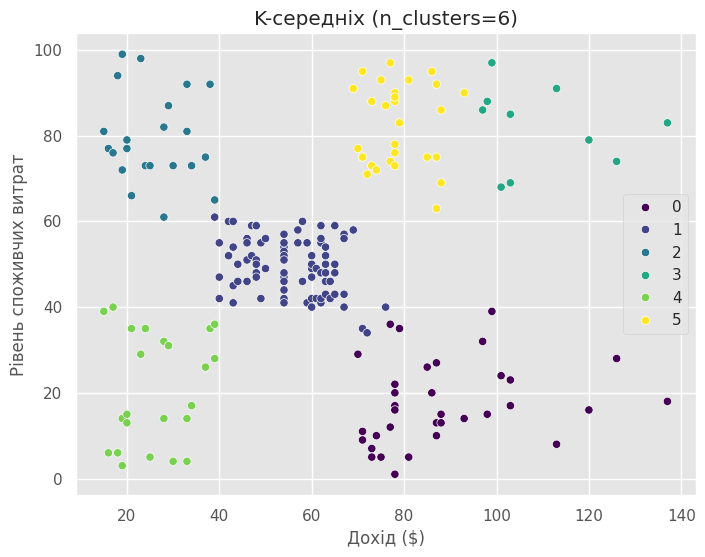

Візуалізуємо результати кластеризації агломеративної ієрархічної кластеризації:


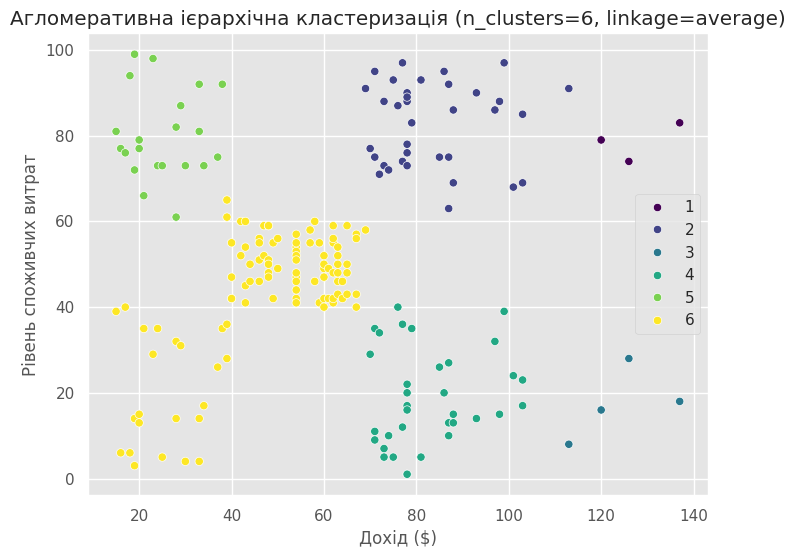

In [ ]:
#Завдання 13

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# Візуалізуємо результати кластеризації методом K-середніх
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Income'], y=X['SpendingScore'], hue=kmeans_clusters, palette='viridis')
plt.title('K-середніх (n_clusters=6)')
plt.xlabel('Дохід ($)')
plt.ylabel('Рівень споживчих витрат')
plt.show()

# Тепер візуалізуємо результати кластеризації агломеративної ієрархічної кластеризації з параметрами linkage, які показали найкращі результати в попередніх завданнях.
print("Візуалізуємо результати кластеризації агломеративної ієрархічної кластеризації:")
# Виконаємо кластеризацію агломеративної ієрархічної кластеризації з оптимальними параметрами

Z = linkage (distance_matrix, method = 'average')
agglomerative_clusters = fcluster(Z, 6, criterion='maxclust')

# Візуалізуємо результати кластеризації методом агломеративної ієрархічної кластеризації
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Income'], y=X['SpendingScore'], hue=agglomerative_clusters, palette='viridis')
plt.title('Агломеративна ієрархічна кластеризація (n_clusters=6, linkage=average)')
plt.xlabel('Дохід ($)')
plt.ylabel('Рівень споживчих витрат')
plt.show()

**Висновки з завдання 13 (детальні)**

Провівши порівняльний аналіз результатів кластеризації методами K-середніх та агломеративної ієрархічної кластеризації, можна зробити такі висновки:

1. **Структура кластерів:**
    - Обидва методи дозволяють виділити кластери з різними рівнями доходу та споживчих витрат.

2. **Розподіл даних:**
    - Метод K-середніх може призвести до створення кластерів, які можуть бути одноріднішими за розміром і щільністю, особливо при використанні евклідової метрики.
    - Агломеративна ієрархічна кластеризація може створювати кластери, які можуть бути різнорідними за розміром і формою.

3. **Інтерпретація кластерів:**
    - Інтерпретація кластерів може бути більш простою і прямолінійною в методі K-середніх, де кожен кластер є групою точок, згрупованих навколо центру кластера.
    - В агломеративної ієрархічної кластеризації інтерпретація кластерів може бути складнішою через ієрархічну структуру, де кожен кластер може бути підкластером інших кластерів.

4. Виходячи з цих спостережень, вибір між методами кластеризації залежатиме від цілей аналізу, особливостей даних та переваг аналітика.